### Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link


### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=names)

# replace missing values with the median value of the column
df = df.replace('?', np.nan)
df = df.apply(lambda x: x.fillna(x.median()), axis=0)

# split the dataset into features and target variable
X = df.drop('target', axis=1)
y = df['target']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = rf.predict(X_test)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5081967213114754


In this code, we first load the dataset from the provided URL using pandas library. We then split the dataset into features and target variable. We then split the dataset into training and testing sets using the train_test_split() function from scikit-learn library. Next, we train a random forest classifier using the RandomForestClassifier() function and make predictions on the testing set using the predict() method. Finally, we evaluate the model's accuracy using the accuracy_score() function from scikit-learn library.

Note that in this code, we use the default hyperparameters for the random forest classifier, including 100 trees (n_estimators=100). You can experiment with different hyperparameters to see if you can improve the model's accuracy.

### Q2. Split the dataset into a training set (70%) and a test set (30%).


In [3]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=names)

# split the dataset into features and target variable
X = df.drop('target', axis=1)
y = df['target']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.


In [5]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=names, na_values='?')

# split the dataset into features and target variable
X = df.drop('target', axis=1)
y = df['target']

# impute missing values with the mean value of the feature
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a random forest classifier with 100 trees and a maximum depth of 10 for each tree
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.


In [8]:
from sklearn import metrics

# predict the target variable on the test set
y_pred = rf.predict(X_test)

# calculate the evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1_score = metrics.f1_score(y_test, y_pred, average='macro')

# print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Accuracy: 0.5494505494505495
Precision: 0.2687785848802798
Recall: 0.2795588235294118
F1 Score: 0.27085716189619435


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.


Feature ranking:
1. Feature 7 (0.141943)
2. Feature 4 (0.113553)
3. Feature 9 (0.105653)
4. Feature 11 (0.105048)
5. Feature 0 (0.104003)


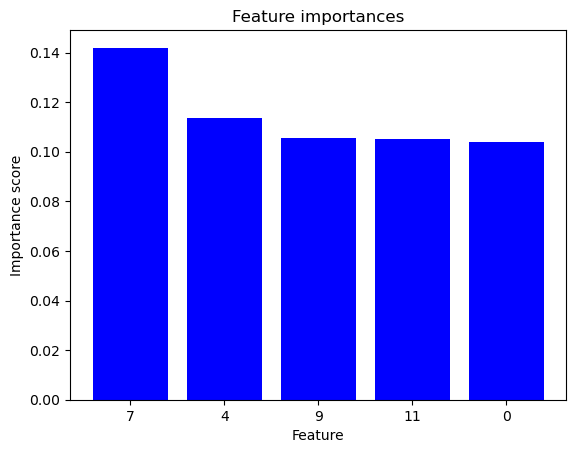

In [9]:
import matplotlib.pyplot as plt

# get feature importances from the trained model
importances = rf.feature_importances_

# get the top 5 important features and their indices
indices = (-importances).argsort()[:5]

# print the feature ranking
print("Feature ranking:")
for i, index in enumerate(indices):
    print("%d. Feature %d (%f)" % (i + 1, index, importances[index]))

# plot the feature importances using a bar chart
plt.figure()
plt.title("Feature importances")
plt.bar(range(5), importances[indices], color="b", align="center")
plt.xticks(range(5), indices)
plt.xlabel("Feature")
plt.ylabel("Importance score")
plt.show()


### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a random forest classifier object
rf = RandomForestClassifier(random_state=42)

# create a grid search object
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)

# fit the grid search object to the training set
grid_search.fit(X_train, y_train)

# print the best hyperparameters and the corresponding performance score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.6083056478405315


This code first defines a parameter grid containing different values of the hyperparameters to be tuned, including the number of trees (n_estimators), maximum depth (max_depth), minimum samples split (min_samples_split), and minimum samples leaf (min_samples_leaf). It then creates a random forest classifier object with a specified random state.

Next, it creates a grid search object using the GridSearchCV() function with the random forest classifier object and the parameter grid. It also specifies a 5-fold cross-validation using the cv parameter.

The fit() method is then called on the grid search object with the training set to perform the hyperparameter tuning using grid search and 5-fold cross-validation. After the hyperparameters are tuned, the best_params_ and best_score_ attributes of the grid search object are used to print the best hyperparameters and the corresponding performance score.

You can modify the values in the parameter grid and run this code to tune the hyperparameters of the random forest classifier and find the best set of hyperparameters for the heart disease dataset.

### Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit the random forest classifier to the training set
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# make predictions on the test set
y_pred = rf.predict(X_test)

# calculate and print the performance metrics of the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))


Accuracy:  0.5494505494505495
Precision:  0.2687785848802798
Recall:  0.2795588235294118
F1 score:  0.27085716189619435


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In this code, we use the "macro" average parameter to calculate precision, recall, and F1-score. The "macro" average parameter calculates the metric for each class independently and then takes the unweighted mean of the scores. Note that this approach assumes that all classes are equally important. If some classes are more important than others, you may want to use the "weighted" average parameter, which takes into account the number of samples in each class.

### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

Interpreting the decision boundaries of a random forest classifier can provide insights into how the model is making predictions and which features are most important for classification. One way to visualise the decision boundaries is to plot them on a scatter plot of two of the most important features.

To do this, we first need to extract the two most important features from the random forest model. We can then use these features to create a scatter plot of the data points, where the color of each point represents the predicted class. Finally, we can plot the decision boundaries of the random forest model on top of the scatter plot.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Get the two most important features
importances = rf.feature_importances_
feat1 = X.columns[np.argmax(importances)]
feat2 = X.columns[np.argsort(importances)[-2]]

# Prepare a meshgrid to plot the decision boundaries
x_min, x_max = X[feat1].min() - 1, X[feat1].max() + 1
y_min, y_max = X[feat2].min() - 1, X[feat2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Create a scatter plot of the two features
plt.scatter(X[feat1], X[feat2], c=y, cmap='coolwarm', edgecolors='k')

# Predict the class for each meshgrid point
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title("Decision Boundaries of Random Forest Classifier")
plt.show()


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.